/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/data_collection/get_crypto_price_range.py:31: DtypeWarning: Columns (147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


Error processing gho: Unknown datetime string format, unable to parse: principal_market_usd, at position 0


/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/data_collection/get_crypto_price_range.py:78: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


Error processing kuji: Unknown datetime string format, unable to parse: principal_market_usd, at position 0
                  TOTAL3
2024-08-25  5.982363e+11
2024-08-26  5.817733e+11
2024-08-27  5.605948e+11
2024-08-28  5.571562e+11
2024-08-29  5.543051e+11


<Axes: >

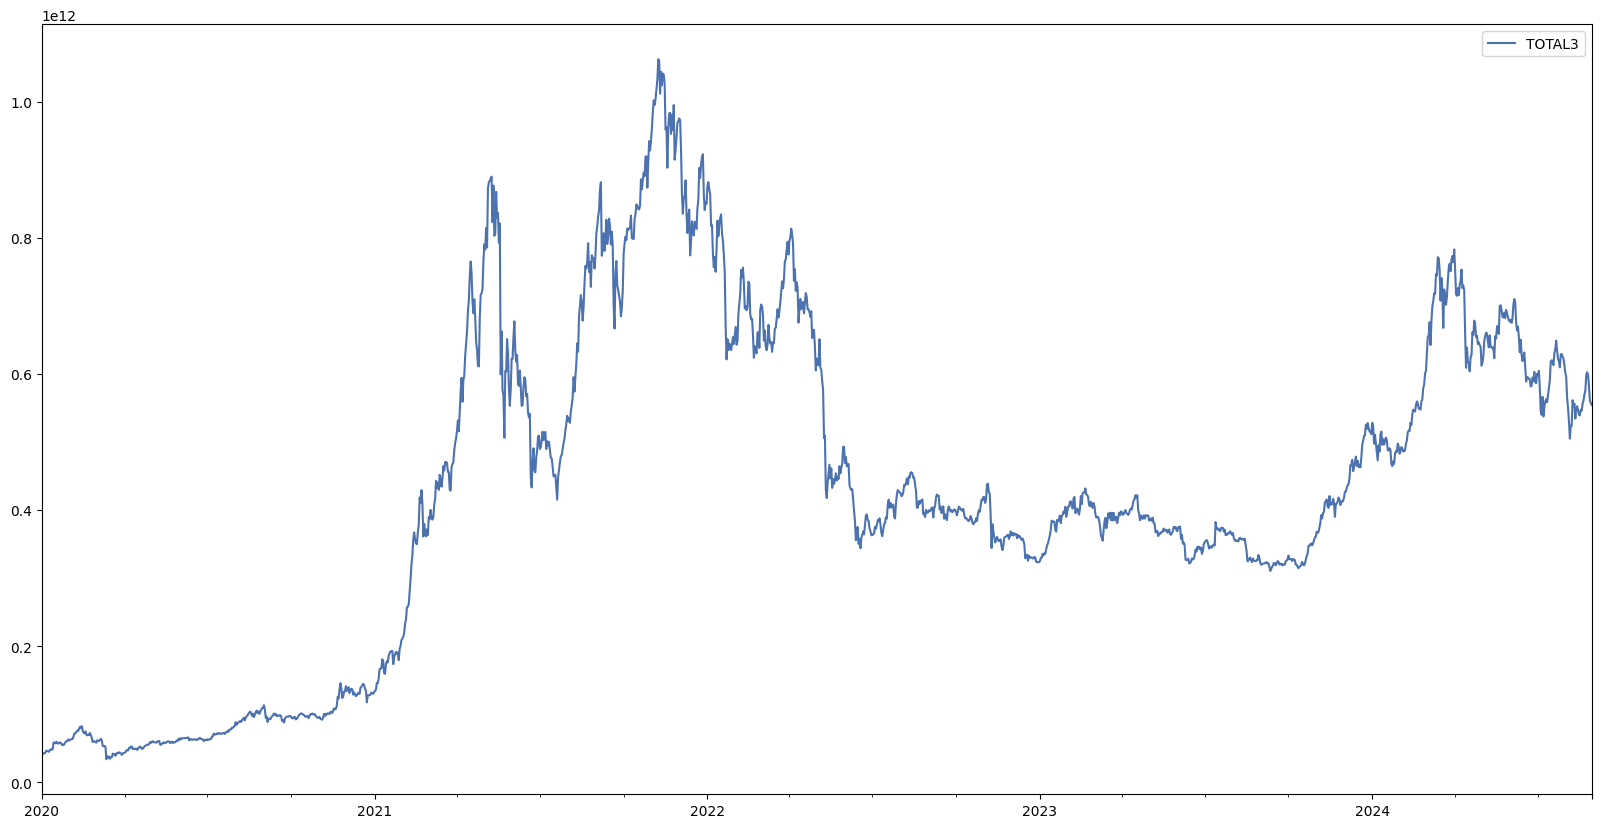

In [2]:
from portfolio_optimization.data_collection.get_crypto_price_range import get_historical_prices_for_assets
import pandas as pd

data = get_historical_prices_for_assets(
    interested_columns=["CapMrktEstUSD"],
    start_date=pd.to_datetime("2020-01-01"),
    end_date=pd.to_datetime("2024-08-29"),
)

# remove all columns containing "eth" or "btc"
data = data.loc[:, ~data.columns.str.contains('eth|btc', case=False)]

# Merge all the CapMrktEstUSD columns into one by summing them
data["TOTAL3"] = data.sum(axis=1)
# Drop the rest of the CapMrktEstUSD columns
data.drop(data.columns[data.columns.str.contains("CapMrktEstUSD")], axis=1, inplace=True)

print(data.tail())

data.plot(figsize=(20, 10))